# PROJECT

---

## START BY DEPENDENCIES

In [29]:
%matplotlib inline

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("Resources/heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [31]:
heart_disease_count = data['HeartDisease'].value_counts()


print("Number of individuals with heart disease:", heart_disease_count)

Number of individuals with heart disease: HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64


### Clean The Data for Patients with Heart Desease

In [32]:
cleaned_data= data[data['HeartDisease'] == 'Yes']
cleaned_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
42,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No


In [33]:
heart_disease_count = cleaned_data['HeartDisease'].value_counts().loc['Yes']


print("Number of individuals with heart disease:", heart_disease_count)

Number of individuals with heart disease: 27373


## CLEANING MY ROLE

In [34]:


halu_df = cleaned_data[['HeartDisease', 'Race', 'GenHealth', 'MentalHealth','PhysicalHealth', 'PhysicalActivity']].copy()
halu_df.head()

,HeartDisease,Race,GenHealth,MentalHealth,PhysicalHealth,PhysicalActivity
5,Yes,Black,Fair,0.0,6.0,No
10,Yes,White,Poor,0.0,30.0,No
35,Yes,White,Poor,0.0,10.0,Yes
42,Yes,White,Good,0.0,0.0,No
43,Yes,White,Fair,2.0,6.0,Yes


## Race Vs Heart Disease

                                Heart Disease Cases
Race                                               
White                                         22507
Black                                          1729
Hispanic                                       1443
Other                                           886
American Indian/Alaskan Native                  542
Asian                                           266


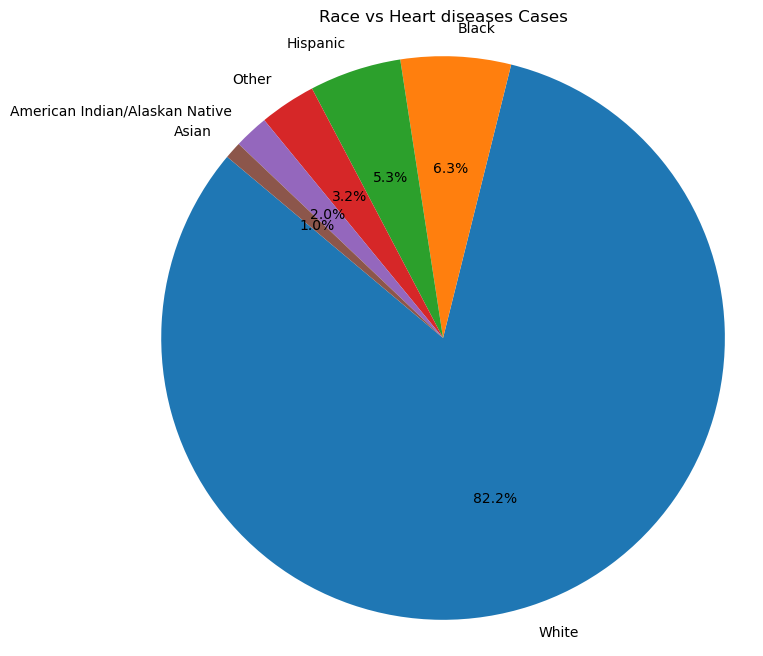

In [42]:
Race = pd.DataFrame(halu_df['Race'].value_counts())
Race.columns = ['Heart Disease Cases']

print(Race)
plt.figure(figsize=(8, 8))
plt.pie(Race['Heart Disease Cases'], labels=Race.index, autopct='%1.1f%%', startangle=140)
plt.title('Race vs Heart diseases Cases')
plt.axis('equal')  
plt.savefig("output/race_Vs_HeartDisease.png")
plt.show()

##  Mental Health Vs Heart Disease

0-5      3517
6-10     1325
11-15    1132
16-20     527
21-25     262
26-30    2395
Name: count, dtype: int64


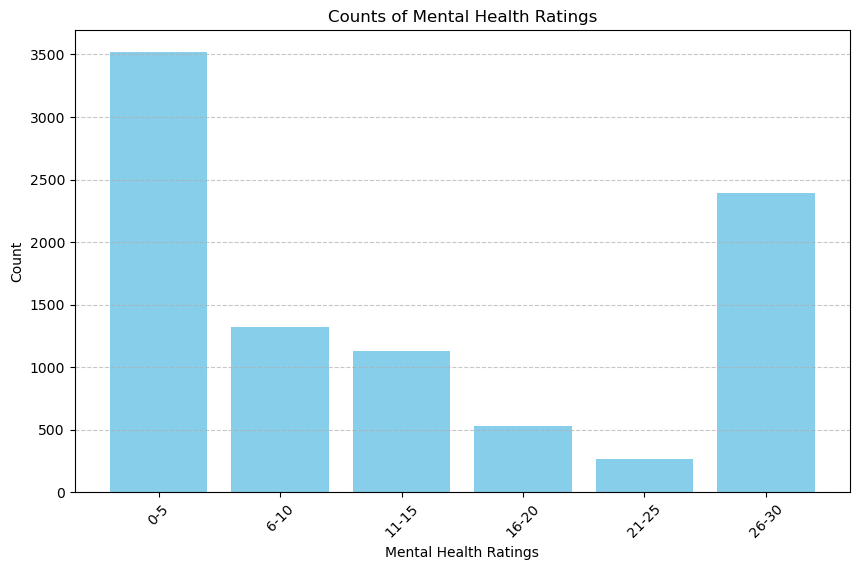

In [43]:
bins_mental = [0, 5, 10, 15, 20, 25, 30]

mental_health_bins = pd.cut(halu_df['MentalHealth'], bins=bins_mental)

mental_health_counts = mental_health_bins.value_counts().sort_index()

mental_health_counts.index = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30']

print(mental_health_counts)

plt.figure(figsize=(10, 6))
plt.bar(mental_health_counts.index, mental_health_counts, color='skyblue')
plt.xlabel('Mental Health Ratings')
plt.ylabel('Count')
plt.title('Counts of Mental Health Ratings')
plt.xticks(rotation=45)
plt.savefig("output/mental_Vs_HeartDisease.png")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Physical Health Vs Heart Disease

In [ ]:
bins = [0, 10, 20, 30]

physical_health = pd.cut(halu_df['PhysicalHealth'], bins=bins)

phyHealth_counts = physical_health.value_counts()

phyHealth_counts.index = ['0-10', '11-20', '21-30']

phyHealth_counts

0-10     5640
11-20    5221
21-30    2090
Name: count, dtype: int64

GenHealth
Good         9558
Fair         7084
Very good    5381
Poor         3850
Excellent    1500
Name: count, dtype: int64


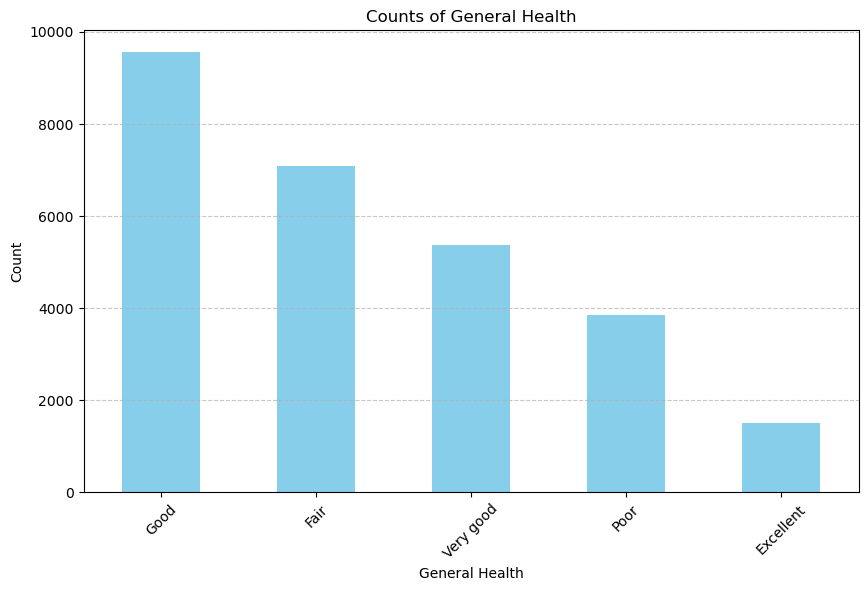

In [44]:

genhealth_counts = halu_df['GenHealth'].value_counts()

print(genhealth_counts)

plt.figure(figsize=(10, 6))
genhealth_counts.plot(kind='bar', color='skyblue')
plt.xlabel('General Health')
plt.ylabel('Count')
plt.title('Counts of General Health')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("output/GenHealth_Vs_HeartDisease.png")
plt.show()

In [ ]:
active = halu_df[(halu_df['PhysicalActivity'] == 'Yes')]
notactive = halu_df[(halu_df['PhysicalActivity'] == 'No')]
print("Pacients who are active in sports:", active.shape[0])
print("Pacients who are notactive in sports:", notactive.shape[0])

Pacients who are active in sports: 17489
Pacients who are notactive in sports: 9884


## SUMMARY STASTICS

In [ ]:
meanPH = halu_df['PhysicalHealth'].mean()
medianPH = halu_df['PhysicalHealth'].median()
variancePH = halu_df['PhysicalHealth'].var()
std_devPH = halu_df['PhysicalHealth'].std()
sem_PH = halu_df['PhysicalHealth'].sem()

physical_health_statistics_df = pd.DataFrame({
    'Mean': [meanPH],
    'Median': [medianPH],
    'Variance': [variancePH],
    'Standard Deviation': [std_devPH],
    'SEM': [sem_PH]
})

print(physical_health_statistics_df)

       Mean  Median    Variance  Standard Deviation       SEM
0  7.808242     0.0  131.969986           11.487819  0.069435


In [ ]:
physical_health_grouped_stats = halu_df.groupby('Race')['PhysicalHealth'].agg(['mean', 'median', 'var', 'std', 'sem'])

physical_health_grouped_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']

physical_health_grouped_stats

,Mean,Median,Variance,Standard Deviation,SEM
Race,,,,,
American Indian/Alaskan Native,10.140221,3.0,150.172538,12.254491,0.526375
Asian,5.075188,0.0,93.662250,9.677926,0.593392
Black,8.681897,2.0,131.794585,11.480182,0.276090
Hispanic,8.672211,0.0,142.239914,11.926438,0.313962
Other,9.819413,3.0,149.759442,12.237624,0.411131
White,7.582708,0.0,130.132889,11.407580,0.076039
